In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
titles.title.value_counts().head(10)


Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Maya                    11
The Outsider            11
She                     11
Blood Money             11
Anna Karenina           10
Victory                 10
dtype: int64

In [83]:
#cast.title.value_counts()
#c = cast
#oneactor = cast.title.value_counts()[cast.title.value_counts()== 1]

redford_movies = cast[cast.name == "Robert Redford"].title.value_counts()[cast.title.value_counts() == 1]
redford_movies

#cast[cast.title.isin(redford_movies)].title.value_counts().head(5)


        


All Is Lost    1
dtype: int64

In [9]:
titles[titles.title == "Around the World in Eighty Days"]

,title,year
194246,Around the World in Eighty Days,1956


In [31]:
cast[(cast.title == "Around the World in Eighty Days") &(cast.n.notnull())]
len(cast)


3336592

In [38]:
#titles.sort('year')

### Which three years of the 1930s saw the most films released?

In [91]:
titles[(titles.year == 1930)].year.value_counts()

1930    811
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

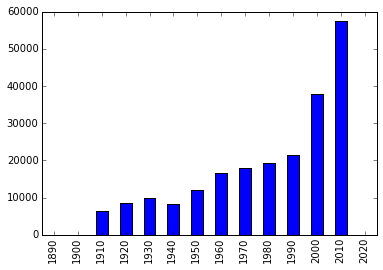

In [93]:
titles['decade'] = (titles.year // 10)*10
titles.decade.value_counts().sort_index().plot(kind = 'bar')#Sort object by labels (along an axis)

### Plot the number of "Hamlet" films made each decade.

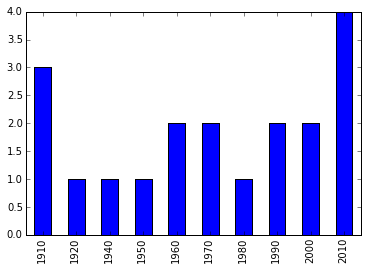

In [138]:
t = titles
(t[t.title == "Hamlet"].year//10*10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

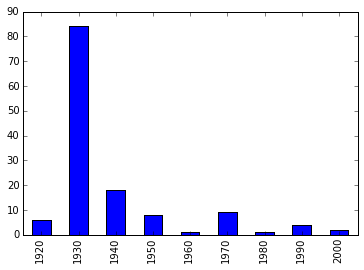

In [101]:
c = cast[cast.character == "Rustler"]
(c.year//10 *10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

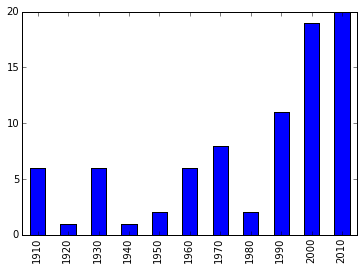

In [105]:
c=cast
(c[c.character == "Hamlet"].year//10 *10).value_counts().sort_index().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [108]:
c = cast
c.character.value_counts().head(11)

Himself        18916
Dancer         11076
Extra           9158
Reporter        7655
Doctor          6850
Policeman       6506
Student         6377
Bartender       6183
Nurse           6171
Party Guest     5923
Minor Role      5920
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [110]:
c = cast
c[c.character == "Herself"].name.value_counts().head(10)


Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Lili?n Garc?a          6
Bunny Yeager           5
Rekha                  5
Kareena Kapoor         5
Marilyn Monroe         5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [111]:
c = cast
c[c.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
George W. Bush           20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [113]:
c = cast
c[c.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Franklyn Farnum    25
Tom London         24
Pierre Watkin      24
Edmund Cobb        24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [115]:
c = cast
c[c.year == 1985].name.value_counts().head(10)

Mammootty        19
Shakti Kapoor    19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
Mohanlal         13
Rajesh Khanna    13
Raj Babbar       13
Deven Verma      13
Asrani           12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

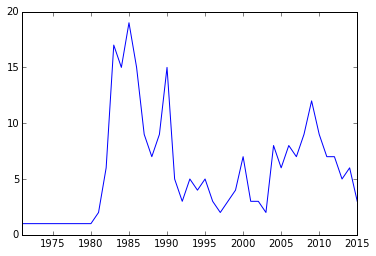

In [137]:
c = cast
c[c.name == "Mammootty"].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [145]:
c = cast
c=c[c.character.str.startswith("Patron in")]
c.character.value_counts().head(10)

#t.character.value_counts()

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in restaurant             3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [44]:
c = cast[cast.character.str.contains("Science")]
c.character.value_counts().head(10)

Science Teacher                            54
The Science Fair Contestants & Families     9
Science Fair Student                        8
Science Student                             8
Science Reporter                            5
Science Club Member                         5
Science Promo Cadet                         4
Science Kid                                 4
Science Fair Judge                          4
Science Officer                             3
dtype: int64

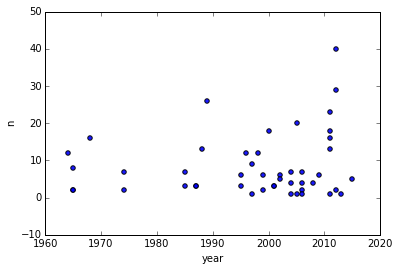

In [48]:
c = cast[cast.name == "Judi Dench"]
c.plot(kind = 'scatter', x='year', y = 'n',  alpha = 0.9)

In [11]:

c = cast[cast.name == "Judi Dench"]
d = c.groupby(['year', 'n']).size()
d = d.unstack('n')
d.fillna(' ',  inplace = True)
d

n,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,16.0,18.0,20.0,23.0,26.0,29.0,40.0
year,,,,,,,,,,,,,,,,,,
1964,,,,,,,,,,1,,,,,,,,
1965,,2,,,,,,1,,,,,,,,,,
1968,,,,,,,,,,,,1,,,,,,
1974,,1,,,,,1,,,,,,,,,,,
1985,,,1,,,,1,,,,,,,,,,,
1987,,,2,,,,,,,,,,,,,,,
1988,,,,,,,,,,,1,,,,,,,
1989,,,,,,,,,,,,,,,,1,,
1995,,,1,,,1,,,,,,,,,,,,


### Plot the n-values of the roles that Judi Dench has played over her career.

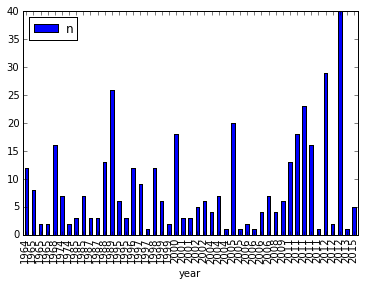

In [11]:
c = cast
c=c[c.name == "Judi Dench"].sort('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'bar')


### Plot the n-values of Cary Grant's roles through his career.

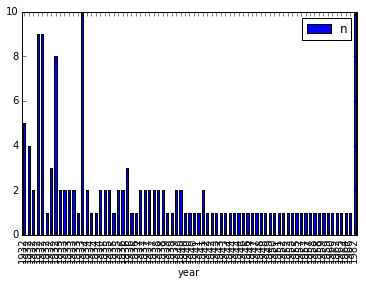

In [13]:
c = cast
c=c[c.name == "Cary Grant"].sort('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'bar');

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

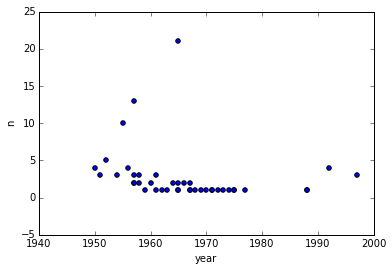

In [14]:
c = cast
c=c[c.name == "Sidney Poitier"].sort('year')
c = c[c.n.notnull()]
c.plot(x = 'year', y = 'n', kind = 'scatter')


### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [15]:
c = cast
c = c[(c.year//10 *10) == 1950]
c = c[c.n == 1]
c.type.value_counts()

actor      6389
actress    2813
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [16]:
c = cast
c = c[(c.year//10 * 10) == 1950]
c = c[c.n == 2]
c.type.value_counts()

actress    4405
actor      4382
dtype: int64